<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Clasificaci%C3%B3n_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔽 Regresión logistica**

**🔹 Matiz de Confusión**

La matriz de confusión es una herramienta clave para evaluar el rendimiento de un modelo de clasificación.
Para un problema de clasificación binaria (dos clases), la matriz de confusión es una tabla de 2x2 que organiza los resultados de las predicciones en cuatro categorías:


|                 | **Predicción Positiva** | **Predicción Negativa** |
|-----------------|-------------------------|-------------------------|
| **Clase Positiva**  | Verdaderos Positivos (VP)  | Falsos Negativos (FN)   |
| **Clase Negativa**  | Falsos Positivos (FP)      | Verdaderos Negativos (VN)|


**🔹 Métricas derivadas de la matriz de confusión**

1. **Exactitud (Accuracy)**: Es el porcentaje de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.

2. **Precisión (Precision)**: Es la proporción de predicciones positivas correctas respecto al total de predicciones positivas. Indica la calidad de las predicciones positivas.

3. **Sensibilidad o Recall (Tasa de Verdaderos Positivos)**: Es la proporción de casos positivos correctamente identificados. Mide la capacidad del modelo para detectar la clase positiva.

4. **Especificidad (Specificity)**: Es la proporción de casos negativos correctamente identificados. Mide la capacidad del modelo para detectar la clase negativa.

5. **F1-Score**: Es una media armónica entre la precisión y la sensibilidad. Se usa cuando hay un balance desigual entre las clases o cuando se busca un equilibrio entre precisión y recall.

## **🔸 Ejemplo de aplicación**

↪ Se crea el modelo

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Se carga el conjunto de datos
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
#Se convierte en un problema de clasificación binaria (se van a utilizar solo las clases 0 y 1)
binary_mask = y < 2
x_binary = x[binary_mask]
y_binary = y[binary_mask]

In [ ]:
#Se dividen en train/test. Se entrena y aplica el modelo
x_train, x_test, y_train, y_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

↪ Se genera matriz de confusion y calculan metricas

In [ ]:
#Se genera matriz
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[17  0]
 [ 0 13]]


In [ ]:
#Se calculan las metricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión (Precision): {precision}")
print(f"Recall (Sensibilidad): {recall}")
print(f"F1 Score: {f1}")

Exactitud (Accuracy): 1.0
Precisión (Precision): 1.0
Recall (Sensibilidad): 1.0
F1 Score: 1.0


↪ Visualizacion del modelo (con funcion **Sigmoide**)


La función sigmoide, que es la clave en la regresión logística. Esta función convierte la salida continua de una combinación lineal de las características en una probabilidad entre 0 y 1.

👉  **σ(z)= 1 / 1+e−z**

Donde  z  es la combinación lineal de las características y los coeficientes del modelo.

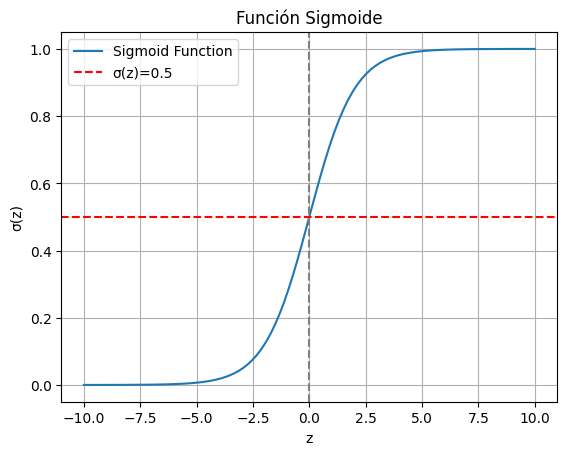

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.axvline(0, color='grey', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label='σ(z)=0.5')
plt.legend()
plt.show()

## **🔸 Ejemplo de aplicación con regularizacion**

↪ Se crea el modelo

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_gaussian_quantiles(n_features=10, n_classes=2,n_samples=1000,random_state=1)
X2, Y2 = make_classification(n_features=10, n_classes=2,n_samples=1000,random_state=1,n_informative=3,n_clusters_per_class=1)

X1.shape

(1000, 10)

↪ Entrenamos y evaluamos el modelo

In [7]:
x = X1
y = Y1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logreg = LogisticRegression(penalty = None)
logreg.fit(x_train_scaled, y_train)

y_pred_log = logreg.predict(x_test_scaled)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred_log)}")
print(classification_report(y_test, y_pred_log))

Accuracy Logistic Regression: 0.48
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       156
           1       0.47      0.59      0.52       144

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.47       300



↪ Modelo con regularización **L2 (Ridge)**

En la regularización L2 se penaliza los coeficientes grandes para evitar sobreajuste.

In [8]:
#C es el inverso de lambda, cuanto más pequeño, mayor es la regularización.
logreg_l2 = LogisticRegression(penalty='l2', C=0.1)
logreg_l2.fit(x_train_scaled, y_train)

y_pred_l2 = logreg_l2.predict(x_test_scaled)

print(f"Accuracy (L2): {accuracy_score(y_test, y_pred_l2)}")
print(classification_report(y_test, y_pred_l2))

Accuracy (L2): 0.48
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       156
           1       0.47      0.59      0.52       144

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.47       300



↪ Modelo con regularización **L1 (Lasso)**

La regularización L1, no solo evita el sobreajuste, sino que puede llevar a una selección de características al hacer que algunos coeficientes se vuelvan exactamente cero. (Útil en DS con muchas variables).

In [9]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg_l1.fit(x_train_scaled, y_train)

y_pred_l1 = logreg_l1.predict(x_test_scaled)

print(f"Accuracy (L1): {accuracy_score(y_test, y_pred_l1)}")
print(classification_report(y_test, y_pred_l1))

Accuracy (L1): 0.5066666666666667
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       156
           1       0.49      0.53      0.51       144

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



# **🔽 Arbol de desicion**

Los árboles de decisión son un tipo de algoritmo de aprendizaje supervisado que se utilizan tanto para problemas de clasificación como de regresión.

Los árboles de decisión dividen iterativamente el conjunto de datos en subconjuntos más homogéneos, basándose en alguna característica de los datos. Cada división se hace seleccionando la característica que proporciona la mayor información o la mejor reducción de impureza.

## **🔸 Ejemplo de aplicación**

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
data = load_breast_cancer()
x = data.data
y = data.target

↪ Entrenamos y evaluamos el modelo

❗ DecisionTreeClassifier en sklearn permite ajustar varios hiperparámetros que controlan el comportamiento y la complejidad del modelo.

**criterion:** Especifica la métrica utilizada para evaluar la calidad de una división. Los valores comunes son "gini" (impureza de Gini) y "entropy" (entropía para el cálculo de la información ganada).

**max_depth:** Controla la profundidad máxima del árbol. Un árbol muy profundo puede ajustarse demasiado a los datos de entrenamiento, lo que provoca un overfitting.

**min_samples_split:** El número mínimo de muestras que un nodo debe tener para que se divida. Aumentar este valor puede prevenir que el árbol se ajuste demasiado a los datos de entrenamiento.

**min_samples_leaf:** El número mínimo de muestras que debe tener una hoja. Esto también ayuda a controlar el sobreajuste.

**max_features:** El número máximo de características a considerar al hacer divisiones en cada nodo. Esto puede acelerar el entrenamiento y hacer el modelo más robusto.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



↪ Visualización del modelo

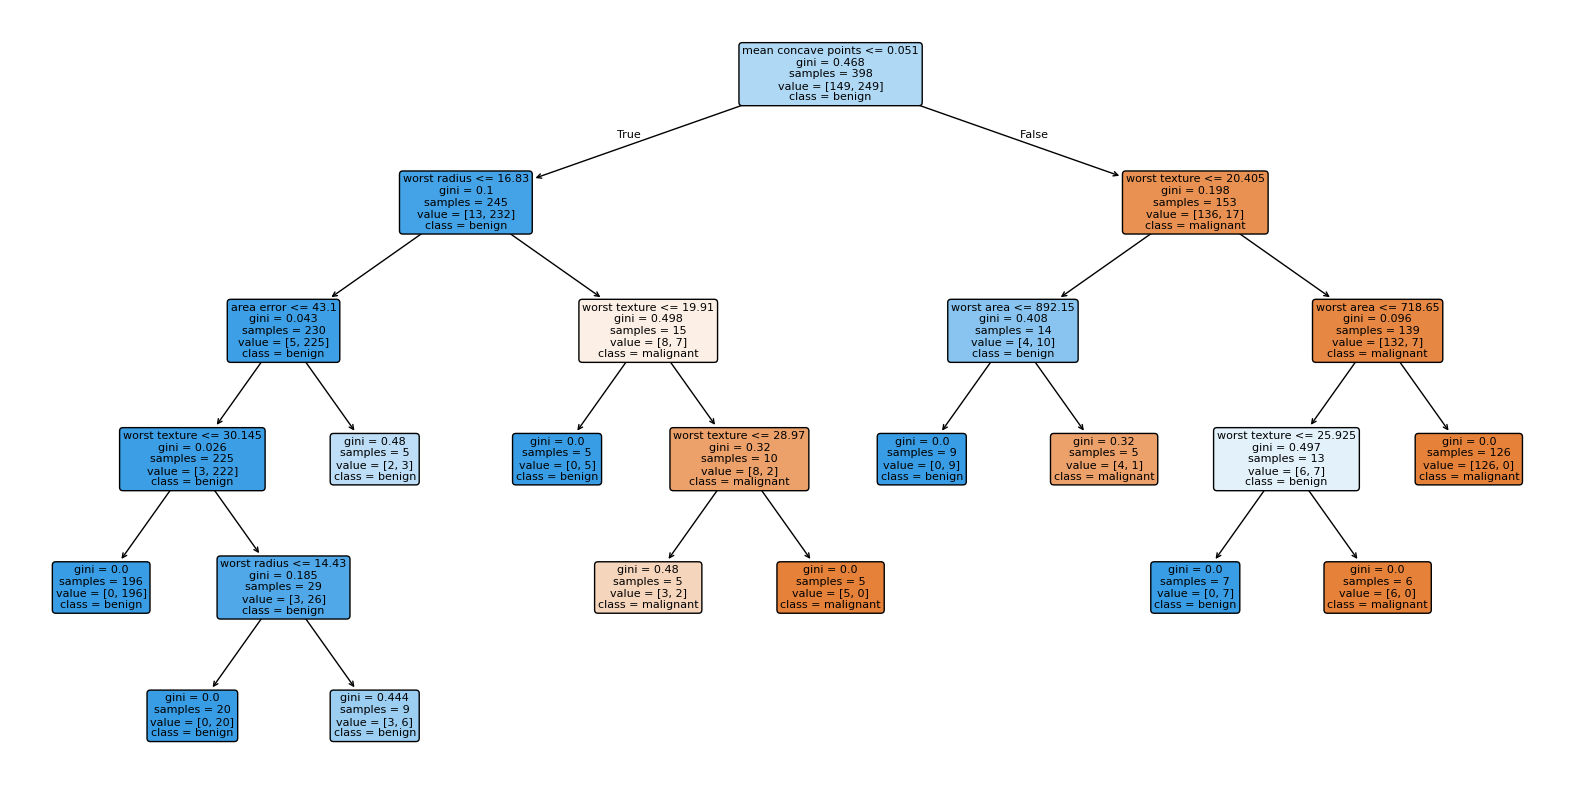

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

# **🔽 KNN**

El modelo K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión.

El algoritmo busca los k vecinos más cercanos en el conjunto de datos de entrenamiento y asigna la clase más común entre esos vecinos a la nueva observación.

## **🔸 Ejemplo de aplicación**

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
data = load_iris()
x = data.data
y = data.target

↪ Entrenamos y evaluamos el modelo

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

